In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, confusion_matrix

In [9]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.shape

(891, 15)

In [ ]:
titanic.

### Binary Classification

In [4]:
iris.shape

(150, 5)

In [5]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
iris_mod = iris[iris.species != 'setosa']
iris_mod.shape

(100, 5)

In [7]:
iris_mod.species.value_counts()

versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
iris_mod = pd.get_dummies(iris_mod, drop_first=True)
iris_mod

,sepal_length,sepal_width,petal_length,petal_width,species_virginica
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [9]:
X = iris_mod[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_mod.species_virginica

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

lr = LogisticRegression(max_iter=100, solver="saga")
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
accuracy_score(y_train_pred, y_train)

C:\Users\hasso\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9866666666666667

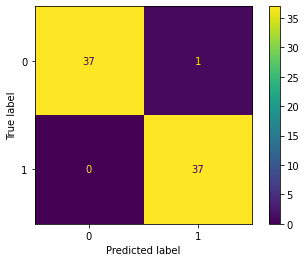

In [10]:
plot_confusion_matrix(lr, X_train, y_train)
plt.show()

In [11]:
confusion_matrix(y_train,y_train_pred)

array([[37,  1],
       [ 0, 37]], dtype=int64)

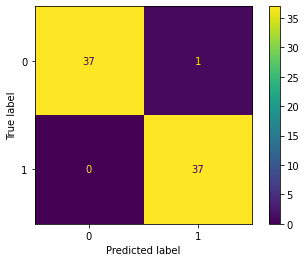

In [12]:
plot_confusion_matrix(lr, X_train, y_train)
plt.show()

In [13]:
TP = 36
TN = 36
FP = 1
FN = 2

Precison = TP/(TP+FP)
Precison

0.972972972972973

In [14]:
precision_score(y_train_pred, y_train)

1.0

In [15]:
recall_score(y_train_pred, y_train)

0.9736842105263158

In [16]:
f1_score(y_train_pred, y_train)

0.9866666666666666

In [17]:
y_test_pred = lr.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.92

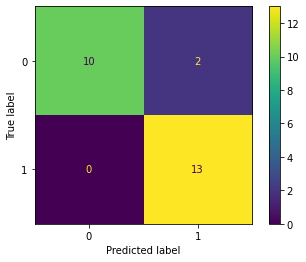

In [18]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

In [19]:
iris_mod.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_virginica
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species_virginica,0.494305,0.308080,0.786424,0.828129,1.000000


In [20]:
X = iris_mod[['sepal_length', 'sepal_width', 'petal_width']]
y = iris_mod.species_virginica

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75, 3), (25, 3), (75,), (25,))

In [21]:
lr = LogisticRegression(max_iter=1000, verbose=1, tol=1e-5)
lr.fit(X_train, y_train)
accuracy_score(lr.predict(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.9466666666666667

FGD

https://www.kaggle.com/c/titanic/data